In [1]:
import pandas as pd
import numpy as np
from prince import MCA
from imblearn.over_sampling import SMOTEN
from collections import Counter


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFECV
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import graphviz 
import matplotlib.pyplot as plt

In [113]:
recipe_df = pd.read_csv('../dataset/recipes.csv')
recipe_with_ingred = pd.read_csv('../dataset/recipe_with_ingredient.csv')
food_df = pd.read_csv('../dataset/food.csv')

In [3]:
recipe_df.head()

,recipe_id,recipe_name,calories,carbohydrate,fat,protein
0,45430986,Gluten-Free Rolls,177,31.06,4.62,3.00
1,42818205,French Fries,203,39.29,3.74,4.75
2,42384638,Chicken Stir Fry,306,39.22,8.51,20.00
3,42288128,Black Bean Salsa,110,13.69,4.77,4.59
4,8629075,Taco Soup,192,18.09,6.88,12.70


In [4]:
recipe_with_ingred.head()

,recipe_id,33919,39699,61271,3419,15845548,75372,570035,1071192,41011,...,40723,1350,72158,49809,2200644,50123,40637,28033,38403,40592
0,45430986,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,42818205,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42384638,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42288128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8629075,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
# sum_ingredients = pd.DataFrame(all_withFeatures[col].sum(axis = 0)/all_withFeatures.shape[0])
recipe_with_ingred = recipe_with_ingred.loc[:, recipe_with_ingred.sum(axis=0)/recipe_with_ingred.shape[0] >= 0.01]

In [150]:
recipe_with_ingred.head()

,recipe_id,3419,36351,6138,33793,33914,36380,39830,33712,36633,...,33866,38225,7175,283520,39536,3420,3092,38110,34212,34792
0,45430986,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,42818205,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42384638,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,42288128,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8629075,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
top_ingred = recipe_with_ingred.loc[:, recipe_with_ingred.sum(axis=0)/recipe_with_ingred.shape[0] >= 0.02]

In [179]:
food_df[food_df['food_id'].isin(top_ingred.columns[1:])]

,food_id,food_name
1,39536,Honey
2,3092,Egg
8,33882,Garlic Powder
9,33890,Paprika
12,36320,Carrots
14,36383,Garlic
16,36291,Broccoli
26,35854,Lime Juice
27,33876,Cumin
35,36442,Onions


In [151]:
food_df.head()

,food_id,food_name
0,6629,Yeast
1,39536,Honey
2,3092,Egg
3,7048,Vegetable Oil
4,263348,Apple Cider Vinegar


In [152]:
len(recipe_with_ingred.columns[1:])

136

In [153]:
food_df[food_df['food_id'].isin(recipe_with_ingred.columns[1:])]

,food_id,food_name
1,39536,Honey
2,3092,Egg
3,7048,Vegetable Oil
8,33882,Garlic Powder
9,33890,Paprika
...,...,...
2174,33842,Sour Cream (Fat Free)
2175,34857,Salsa (Ready to Serve)
2283,38110,Shrimp
2331,35084,Spaghetti/Marinara Pasta Sauce


In [138]:
food_df.loc[food_df.apply(lambda x : x['food_id'] in recipe_with_ingred.columns[1:], axis=1), :]

,food_id,food_name


In [64]:
def mg_apply_func(row):
    fat, carb, protein = row['fat'] * 9, row['carbohydrate'] * 4, row['protein'] * 4
    total = row['calories']
    if total <= 0:
        return 0
    f_percent, c_percent, p_percent = fat / total, carb / total, protein / total
    if p_percent >= 0.35:
        if  0.15 <= f_percent <= 0.3:
            return 1
    return 0

In [65]:
recipe_df['fl_mg'] = recipe_df.apply(mg_apply_func, axis=1)

In [66]:
len(recipe_df[recipe_df['fl_mg'] == 1])

263

### Merge with feature vectors

In [67]:
res_recipe_df = pd.merge(recipe_with_ingred, recipe_df[['recipe_id', 'fl_mg']], on='recipe_id', how='inner')

In [68]:
len(res_recipe_df)

3365

In [69]:
res_recipe_df.head()

,recipe_id,3419,36351,6138,33793,33914,36380,39830,33712,36633,...,38225,7175,283520,39536,3420,3092,38110,34212,34792,fl_mg
0,45430986,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,42818205,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42384638,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,42288128,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8629075,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## UnderSampling

In [70]:
positive_fl_mg = res_recipe_df[res_recipe_df['fl_mg'] == 1]
negative_fl_mg = res_recipe_df[res_recipe_df['fl_mg'] == 0]

In [71]:
len(positive_fl_mg)

263

In [72]:
len(negative_fl_mg )

3102

In [73]:
# undersampling
negative_fl_mg_rs = negative_fl_mg.sample(n= round(len(positive_fl_mg)), random_state=0)

In [74]:
positive_fl_mg.isnull().sum(axis = 1)

29      0
73      0
94      0
143     0
187     0
       ..
3341    0
3350    0
3357    0
3358    0
3364    0
Length: 263, dtype: int64

In [75]:
final_df = pd.concat([positive_fl_mg, negative_fl_mg_rs], axis= 0)

In [76]:
len(final_df)

526

In [48]:
X, y = final_df.iloc[:, 0:final_df.shape[1] - 1], final_df.iloc[:, final_df.shape[1] - 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [49]:
mca = MCA(n_components = 4, n_iter=10, random_state=25)
mca.fit(X_train)
X_train = mca.transform(X_train)
X_test = mca.transform(X_test)

In [50]:
X_train.head()

,0,1,2,3
3295,4.197504,10.220207,10.004234,0.409955
3207,4.091110,8.051120,3.736761,0.651431
1419,0.086637,0.006004,-0.008025,0.007938
1700,-0.000038,0.001434,0.001088,-0.001158
908,0.044201,0.034964,0.016409,0.009482


In [51]:
y_train

3295    0
3207    1
1419    1
1700    0
908     0
       ..
1951    0
1956    1
1492    0
2651    0
1768    1
Name: fl_mg, Length: 631, dtype: int64

In [52]:
print(f"Original class counts in training set: {Counter(y_train)}")
print(f"Original class counts in test set: {Counter(y_test)}")

Original class counts in training set: Counter({0: 414, 1: 217})
Original class counts in test set: Counter({0: 112, 1: 46})


In [53]:
sampler = SMOTEN(random_state=2)
X_train, y_train = sampler.fit_resample(X_train, y_train)

In [54]:
print(f"Original class counts: {Counter(y_train)}")

Original class counts: Counter({0: 414, 1: 414})


In [55]:
mca.eigenvalues_

[0.02161470701928751,
 0.013305595652636235,
 0.008579849366344972,
 0.0077131511801096335]

### Feature Selection Using Tunned Rondom Forest

In [102]:
def printAccruacy(model_name, actual_test, predictions_test, actual_train=None, predictions_train=None):
    print(f'The accuracy of {model_name} is: {accuracy_score(actual_test, predictions_test)}')
    if actual_train is not None and predictions_train is not None:
        print(f'The accuracy of {model_name} on training set is: {accuracy_score(actual_train, predictions_train)}')
    
def printReport(model_name, actual_test, predictions_test):
    print(f'For {model_name}:')
    print('-----------------------------------------------------')
    print(classification_report(actual_test, predictions_test))

In [103]:
# print number of features in original dataset
print('# of features:',final_df.shape[1])

# of features: 138


In [104]:
X, y = final_df.iloc[:, 0:final_df.shape[1] - 1], final_df.iloc[:, final_df.shape[1] - 1]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [80]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['sqrt', 'log2']

# Criterion to split on
rf_criterion = ['gini', 'entropy']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}
rf_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['sqrt', 'log2'],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'bootstrap': [True, False]}

In [81]:
# Create the model to be tuned
rf_base = RandomForestClassifier()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, scoring='f1',
                               n_iter = 200, cv = 5, verbose = 2, random_state = 0, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# View the best parameters from the random search
rf_random.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_impurity_decrease': 0.05,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [110]:
rf_feature_select = RandomForestClassifier()                                       
# n_estimators=400, 
# min_samples_split=10,
# min_impurity_decrease=0.05,
# max_features='sqrt',
# max_depth=20,
# criterion='entropy',
# bootstrap=True
rf_feature_select = rf_feature_select.fit(X_train, y_train)

In [111]:
model = SelectFromModel(rf_feature_select, prefit=True)
new_features_index = model.get_support()

In [112]:
# print number of features after seleciton
num_new_features = sum([1 for i in new_features_index if i])
print('# of features:',num_new_features)

# of features: 40


In [155]:
food_df[food_df['food_id'].isin(X.loc[:, new_features_index].columns[1:])]

,food_id,food_name
8,33882,Garlic Powder
9,33890,Paprika
12,36320,Carrots
14,36383,Garlic
27,33876,Cumin
35,36442,Onions
50,39075,Baking Soda
68,33911,Vanilla Extract
83,37922,Water
91,34212,Olive Oil


In [149]:
printAccruacy('random forest', y_test, rf_feature_select.predict(X_test), y_train, rf_feature_select.predict(X_train))

The accuracy of random forest is: 0.696969696969697
The accuracy of random forest on training set is: 0.96


In [107]:
new_X = X.loc[:, new_features_index]
X_train, X_test, y_train, y_test = train_test_split(new_X , y, test_size=0.20)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

In [108]:
# feature_importance = RFECV(SVC(kernel="linear"), scoring='accuracy')
# feature_importance.fit(X_train, y_train)

### Training - Decision Tree

In [157]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

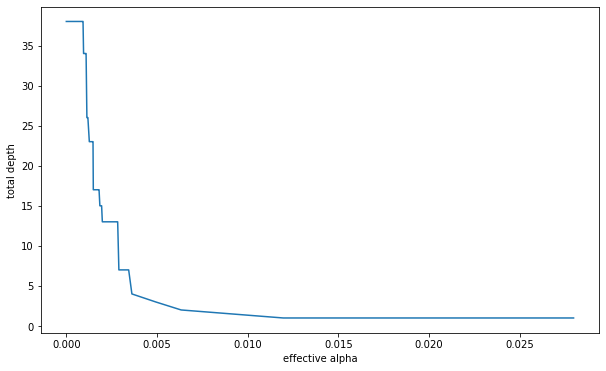

In [158]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas, tree_depths)
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

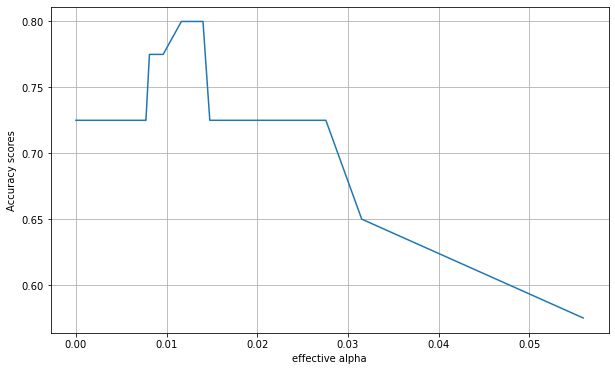

In [296]:
acc_scores = [accuracy_score(y_val, clf.predict(X_val)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas, acc_scores)
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [297]:
def getMaxInd(lst):
    ind = 0
    val = -1
    for i in range(len(lst)):
        if lst[i] >= val:
            ind = i
            val = lst[i]
    return ind


In [298]:
ccp_alphas[getMaxInd(acc_scores)]

0.014014014014014014

In [182]:
# Maximum number of levels in tree
dt_max_depth = [int(x) for x in range(5,50)]
# Add the default as a possible value
dt_max_depth.append(None)

# Number of features to consider at every split
dt_max_features = ['sqrt', 'log2']

# Criterion to split on
dt_criterion = ['gini', 'entropy']

# Minimum number of samples required to split a node
dt_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
dt_min_impurity_decrease = [0.0, 0.05, 0.1]

# Create the grid
dt_grid = {'max_depth': dt_max_depth,
               'max_features': dt_max_features,
               'criterion': dt_criterion,
               'min_samples_split': dt_min_samples_split,
               'min_impurity_decrease': dt_min_impurity_decrease}
# dt_grid

In [184]:
# Create the model to be tuned
dt_base = DecisionTreeClassifier()

# Create the random search Random Forest
dt_random = GridSearchCV(estimator = dt_base, param_grid = dt_grid, scoring='f1',
                              cv = 5, verbose = 2, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)

# View the best parameters from the random search
dt_random.best_params_

Fitting 5 folds for each of 4968 candidates, totalling 24840 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [ ]:
dt_model = DecisionTreeClassifier(min_samples_split=10,
                                  min_impurity_decrease=0,
                                  max_features='log2',
                                  max_depth=42,
                                  criterion='entropy'
                                 )
dt_model.fit(X_train, y_train)

In [132]:
print(f'The accuracy of DT is: {accuracy_score(y_test, dt_model.predict(X_test))}')
print(f'The accuracy of DT on training set is: {accuracy_score(y_train, dt_model.predict(X_train))}')

The accuracy of DT is: 0.6439393939393939
The accuracy of DT on training set is: 0.8323809523809523


In [135]:
printReport('decision tree', y_test, dt_model.predict(X_test))


For decision tree:
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        85
           1       0.50      0.57      0.53        47

    accuracy                           0.64       132
   macro avg       0.62      0.63      0.62       132
weighted avg       0.66      0.64      0.65       132



In [139]:
y_test[y_test == 1].sum()

47

In [88]:
tree_model = DecisionTreeClassifier(ccp_alpha=ccp_alphas[getMaxInd(acc_scores)])
tree_model.fit(X_train, y_train)
TreePredict = tree_model.predict(X_test)

NameError: name 'ccp_alphas' is not defined

In [84]:
print(f'The accuracy of DT is: {accuracy_score(y_test, TreePredict)}')
print(f'The accuracy of DT on training set is: {accuracy_score(y_train, tree_model.predict(X_train))}')

The accuracy of DT is: 0.5789473684210527
The accuracy of DT on training set is: 1.0


### SVM and Tunning

In [121]:
Cs = np.linspace(0.01, 10, 50)

gammas = np.linspace(0.01, 1, 50)
# np.linspace(0.01, 0.02, 30)

svc_grid = {'C': Cs, 'gamma' : gammas}

In [122]:
svc_grid_search = GridSearchCV(SVC(kernel='rbf'), svc_grid, cv=5, n_jobs = -1, verbose = 2, scoring='f1')
svc_grid_search.fit(X_train, y_train)
svc_grid_search.best_params_

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2068 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 4332 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 7252 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 10812 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 12500 out of 12500 | elapsed:   39.3s finished


{'C': 5.106938775510204, 'gamma': 0.01}

In [124]:
svc_model = SVC(C=5.1, gamma=0.01)
svc_model.fit(X_train, y_train)
SvcPredict = svc_model.predict(X_test)
printAccruacy('SVC model', y_test, SvcPredict, y_train, svc_model.predict(X_train))


The accuracy of SVC model is: 0.6515151515151515
The accuracy of SVC model on training set is: 0.9904761904761905


### Training

In [56]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train) 

tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train, y_train )

rf = RandomForestClassifier()
rf.fit(X_train, y_train )

svc_model = SVC()
svc_model.fit(X_train, y_train)



SVC()

In [57]:
mlp = MLPClassifier(max_iter=300)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300)

In [58]:
LogisticPredict = logistic.predict(X_test)
TreePredict = tree_model.predict(X_test)
SvcPredict = svc_model.predict(X_test)
mlpPredict = mlp.predict(X_test)
rfPredict = rf.predict(X_test)

In [59]:
print(f'The accuracy of logistic regression is: {accuracy_score(y_test, LogisticPredict)}')
print(f'The accuracy of DT is: {accuracy_score(y_test, TreePredict)}')
print(f'The accuracy of SVC is: {accuracy_score(y_test, SvcPredict)}')
print(f'The accuracy of MLP is: {accuracy_score(y_test, mlpPredict)}')
print(f'The accuracy of RF is: {accuracy_score(y_test, rfPredict)}')

The accuracy of logistic regression is: 0.27848101265822783
The accuracy of DT is: 0.5443037974683544
The accuracy of SVC is: 0.2974683544303797
The accuracy of MLP is: 0.6455696202531646
The accuracy of RF is: 0.569620253164557


In [60]:
printReport('decision tree', y_test, TreePredict)


For decision tree:
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       112
           1       0.31      0.48      0.38        46

    accuracy                           0.54       158
   macro avg       0.52      0.52      0.51       158
weighted avg       0.61      0.54      0.56       158



In [177]:
print(f'weights: {logistic.coef_}, bias_term: {logistic.intercept_}')

weights: [[-6.51448592e-08 -3.45842256e-15 -9.02789918e-15 -1.37657824e-14
   1.62200956e-15  2.66510299e-15 -1.95382008e-15 -9.23087138e-15
   3.55305605e-15 -1.10071090e-14  1.92602326e-14  6.64963560e-15
   1.30814769e-15 -1.32070551e-15  2.83306217e-15 -8.34337479e-15
  -6.35751432e-15  6.15893835e-15  2.14006859e-15 -8.55478270e-15
   2.16363014e-15  3.17130951e-15  3.09637547e-15  2.63431169e-15
  -9.75673796e-16 -8.20114078e-16 -1.36714257e-14 -7.99715484e-15
   1.43846581e-15 -1.43057497e-14 -1.65942783e-14 -1.85112188e-14
  -1.06451073e-14  6.59563860e-15 -2.47196766e-14  9.28196194e-16
  -2.98319965e-15 -6.61222752e-15 -9.62737702e-15 -9.71239273e-15]], bias_term: [-6.46583098e-14]


In [213]:
tree_f_importance = tree_model.feature_importances_
rf_f_importance = rf.feature_importances_

In [214]:
def mapWithIndex(lst):
    res = []
    for i in range(len(lst)):
        res.append((i, lst[i]))
    return res

def filterNonImportant(lst, threshold):
    res = []
    for i in lst:
        if i[1] >= threshold:
            res.append(i)
    return res

def getIndex(lst):
    res = []
    for i in lst:
        res.append(i[0])
    return res

In [215]:
tree_f_importance = mapWithIndex(tree_f_importance)
rf_f_importance = mapWithIndex(rf_f_importance)

In [217]:
rf_f_importance = filterNonImportant(rf_f_importance, 0.001)
tree_f_importance = filterNonImportant(tree_f_importance, 0.01)

In [218]:
len(tree_f_importance)

29

In [219]:
tree_f_importance.sort(key=lambda x : x[0])
feature_index = getIndex(tree_f_importance)

In [230]:
new_X = X.iloc[:, feature_index]
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2)

In [234]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train) 

tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train, y_train )

rf = RandomForestClassifier()
rf.fit(X_train, y_train )

svc_model = SVC()
svc_model.fit(X_train, y_train)

mlp = MLPClassifier(random_state=1, max_iter=300, activation='logistic')
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=300, random_state=1)

In [235]:
LogisticPredict = logistic.predict(X_test)
TreePredict = tree_model.predict(X_test)
SvcPredict = svc_model.predict(X_test)
mlpPredict = mlp.predict(X_test)
rfPredict = rf.predict(X_test)

In [236]:
print(f'The accuracy of logistic regression is: {accuracy_score(y_test, LogisticPredict)}')
print(f'The accuracy of DT is: {accuracy_score(y_test, TreePredict)}')
print(f'The accuracy of SVC is: {accuracy_score(y_test, SvcPredict)}')
print(f'The accuracy of MLP is: {accuracy_score(y_test, mlpPredict)}')
print(f'The accuracy of RF is: {accuracy_score(y_test, rfPredict)}')

The accuracy of logistic regression is: 0.46
The accuracy of DT is: 0.62
The accuracy of SVC is: 0.59
The accuracy of MLP is: 0.46
The accuracy of RF is: 0.67
